In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import matplotlib as mpl
mpl.rc('text', usetex=True)
sns.set('talk')

/Users/adampah/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
name_trans = pd.read_csv('../../data/group_names_trans.csv', index_col=0)

dfs = []
for country in ['Afghanistan', 'Colombia', 'Iraq']:
    for gdir in glob.glob('../../results/unihawkes/%s/*/' % country):
        temp = pd.read_csv(gdir + 'averaged_parameters.csv', index_col=0)
        temp['gname'] = gdir.split('/')[-2]
        dfs.append(temp)
df = pd.concat(dfs)
df = df[df.gname.isin(name_trans.PandasName)]
df.sort_values('gname', inplace=True)

In [15]:
name_trans

,gname,country_txt,lognkill,eventid,attack_types,weapon_types,mu,AbmGTDname,PandasName
0,1920 Revolution Brigades,Iraq,2.138333,2,1,1,0.003729,1920 Revolution Brigades,1920RevolutionBrigades
1,AQI,Iraq,1.826740,120,6,5,0.022371,AQI,AQI
2,Abu Hafs al-Masri Brigades,Iraq,2.079442,1,1,1,0.003729,Abu Hafs al-Masri Brigades,AbuHafsalMasriBrigades
3,Al Zawahiri Loyalists,Iraq,0.000000,1,1,1,0.003729,Al Zawahiri Loyalists,AlZawahiriLoyalists
4,Al-Qaeda,Afghanistan,0.973233,19,3,2,0.011186,Al-Qaeda,AlQaeda
5,Ansar al-Din,Iraq,0.000000,1,1,1,0.003729,Ansar al-Din,AnsaralDin
6,Ansar al-Islam,Iraq,2.191229,7,2,2,0.007457,Ansar al-Islam,AnsaralIslam
7,Ansar al-Jihad,Iraq,0.000000,1,1,1,0.003729,Ansar al-Jihad,AnsaralJihad
8,Ansar al-Sunna,Iraq,1.822406,16,4,5,0.014914,Ansar al-Sunna,AnsaralSunna
9,Armed Vanguards of a Second Mohammed Army,Iraq,3.218876,1,1,1,0.003729,Armed Vanguards of a Second Mohammed Army,ArmedVanguardsofaSecondMohammedArmy


In [30]:
for x in df.gname:
    print(name_trans[name_trans.PandasName == x].eventid.values[0])

2
120
19
7
16
6
2
4
2
2
3
2
87
5
9
5
276
3
235
51


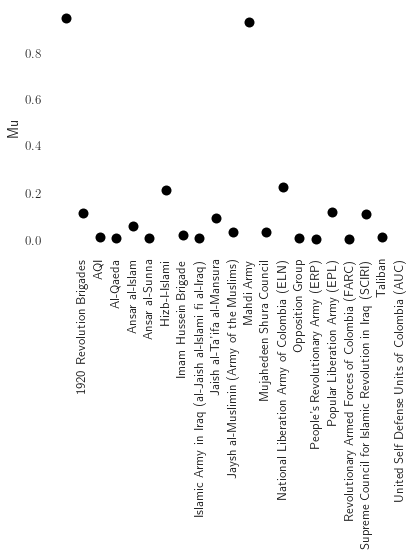

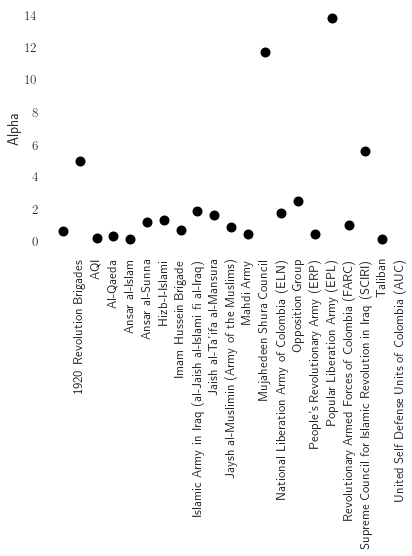

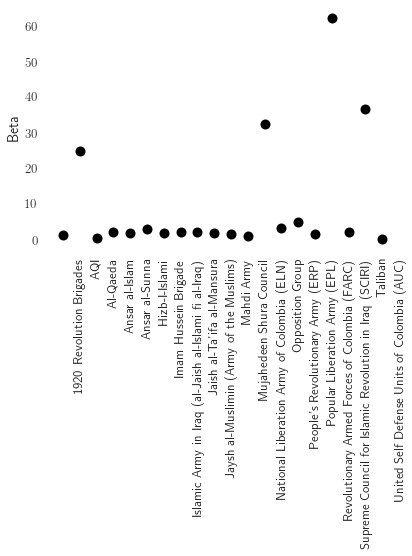

In [32]:
for param in ['mu', 'alpha', 'beta']:
    fig = plt.figure(figsize=(6,8))
    ax = fig.add_subplot(111, facecolor='white')
    markersizes = [name_trans[name_trans.PandasName==x].eventid.values[0] for x in df.gname.values.tolist()]
    ax = df.plot(x='gname', y=param, color='black', style='.', markersize=20, ax=ax)
    ax.set_ylabel(param)
    ax.legend_.remove()
    ax.set_xticks( list([x for x in range(len([''] + df.gname.values.tolist()))]) )
    ax.set_xticklabels([''] + [name_trans[name_trans.PandasName == x].AbmGTDname.values[0] \
                               for x in df.gname.values.tolist()], rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel(param.capitalize())
    plt.tight_layout()
    
    plt.savefig('../../figures/unihawkes_%s.eps' % param)
    plt.savefig('../../figures/unihawkes_%s.png' % param)

In [33]:
mudf = pd.concat([pd.read_csv(fname) for fname in glob.glob('../../data/*_mus.csv')])

In [34]:
def name_cleaner(iname):
    ''' 
    Cleans a groups name to make it usable for the folder name
    '''
    import string
    return ''.join([x for x in iname if x not in string.punctuation and x!=' ']) 

mudf.rename(columns={'mu': 'Mu Priors'}, inplace=True)
mudf['gname'] = mudf.gname.apply(name_cleaner)

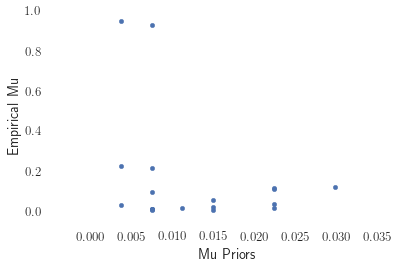

In [36]:
df.rename(columns={'mu':'Empirical Mu'}, inplace=True)
mergedf = pd.merge(mudf, df, on='gname')

fig = plt.figure()
ax = fig.add_subplot(111, facecolor='white')
mergedf.plot(kind='scatter', x='Mu Priors', y='Empirical Mu', ax=ax)

plt.tight_layout()
plt.savefig('../../figures/unihawkes_mu_comparison_prior_empirical.png')
plt.savefig('../../figures/unihawkes_mu_comparison_prior_empirical.eps')

In [43]:
outliers = mergedf.sort_values('Empirical Mu').gname[-2:].values.tolist()

name_trans[name_trans.PandasName.isin(outliers)]

,gname,country_txt,lognkill,eventid,attack_types,weapon_types,mu,AbmGTDname,PandasName
0,1920 Revolution Brigades,Iraq,2.138333,2,1,1,0.003729,1920 Revolution Brigades,1920RevolutionBrigades
29,Mujahedeen Shura Council,Iraq,0.000000,2,2,3,0.007457,Mujahedeen Shura Council,MujahedeenShuraCouncil


In [38]:
import statsmodels.formula.api as smf
mergedf['Mu_Priors'] = mergedf['Mu Priors']
mergedf['Empirical_Mu'] = mergedf['Empirical Mu']

smf.ols(formula= 'Mu_Priors ~ Empirical_Mu -1', data=mergedf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mu_Priors   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.579
Date:                Thu, 02 Aug 2018   Prob (F-statistic):              0.224
Time:                        14:22:25   Log-Likelihood:                 57.173
No. Observations:                  20   AIC:                            -112.3
Df Residuals:                      19   BIC:                            -111.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Empirical_Mu     0.0129      0.010      1.256      0.224      -0.009       0.034
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.203
Skew:                          -0.020   Prob(JB):                        0.904
Kurtosis:                       2.508   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
inclusion = ['AQI', 'AlQaeda','NationalLiberationArmyofColombiaELN',\
             'RevolutionaryArmedForcesofColombiaFARC','Taliban']

import numpy as np
df['daughter'] = df.alpha * np.exp(-df.beta * 1)
df['discount'] = df['Empirical Mu']/(df['Empirical Mu'] + df.daughter) 
df[df.gname.isin(inclusion)].discount.mean()

0.8154026208956449

In [125]:
df.alpha.mean()

4.663258130864301